# <b><u> Lead Score Case Study

### Step 1: Importing Data

In [461]:
# Importing Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
# pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('expand_frame_repr', True)

In [462]:
# Reading csv File
lead_df_main = pd.read_csv('Leads.csv')

In [463]:
# Creating a copy of main Df
lead_df_1 = lead_df_main.copy(deep=True) 

### Step 2: Inspecting the Dataframe

In [464]:
lead_df_1.describe() # describe() gives use the statistics of numeric columns

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [465]:
lead_df_1.shape # Provide with number of rows and columns of a dataframe

(9240, 37)

In [466]:
lead_df_1.info() # give info about datatype , null values and no. of records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [467]:
lead_df_1.columns # List of columns of the dataframe

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [468]:
 # Removing columns Prospect Id and Lead number 
Pros_Lead = lead_df_1.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [469]:
lead_df_1.Converted.value_counts(False)# checking whether the data is imbalanced or not

0    5679
1    3561
Name: Converted, dtype: int64

#### Renaming Columns in the dataframe

In [470]:
lead_df_1.rename(columns=
                {'How did you hear about X Education':'How_did_you_hear_about_X_Education',
                  'Lead Origin':'Lead_Origin',
                  'Lead Source':'Lead_Source','Do Not Email':'Do_Not_Email','Do Not Call':'Do_Not_Call',
                  'Total Time Spent on Website':'Total_Time_Spent_on_Website','Page Views Per Visit':'PageViewsPerVisit',
                  'Last Activity':'LastActivity','How did you hear about X Education':'How_did_you_hear_about_X_Education',
                  'What is your current occupation':'currentoccupation','What matters most to you in choosing a course':'What_matters_most_to_you_in_choosing_a_course',
                  'Newspaper Article':'NewspaperArticle','X Education Forums':'XEducationForums','Digital Advertisement':'DigitalAdvertisement',
                  'Through Recommendations':'Through_Recommendations',
                  'Receive More Updates About Our Courses':'Receive_More_Updates_About_Our_Courses',
                  'Lead Quality':'Lead_Quality',
                  'Update me on Supply Chain Content':'Update_me_on_Supply_Chain_Content',
                  'Get updates on DM Content':'Get_updates_on_DM_Content',
                  'Lead Profile':'Lead_Profile',
                  'Asymmetrique Activity Index':'Asymmetrique_Activity_Index',
                  'Asymmetrique Profile Index':'Asymmetrique_Profile_Index',
                  'Asymmetrique Activity Score':'Asymmetrique_Activity_Score',
                  'Asymmetrique Profile Score':'Asymmetrique_Profile_Score',
                  'I agree to pay the amount through cheque':'I_agree_to_pay_the_amount_through_cheque',
                  'A free copy of Mastering The Interview':'A_free_copy_of_Mastering_The_Interview',
                  'Last Notable Activity':'LastNotableActivity'
                   },inplace=True)


#### Replacing the values of columns with proper values

In [471]:
lead_df_1.Specialization.replace('Select','Finance Management',inplace=True)
lead_df_1.How_did_you_hear_about_X_Education.replace('Select','Other',inplace=True)
lead_df_1.Lead_Source.replace('google','Google',inplace=True)
lead_df_1.Lead_Profile.replace('Select','Other Leads',inplace=True)
lead_df_1.City.replace('Select','Other Cities',inplace=True)
lead_df_1.Country.fillna('unknown',inplace=True)

#### Imputing proper value in columns with improper data

In [472]:
lead_df_1['Country']=np.where((lead_df_1['Country']=='unknown') & (lead_df_1['City']=='Mumbai'),'India',lead_df_1['Country'])
lead_df_1['Country']=np.where((lead_df_1['Country']=='unknown') & (lead_df_1['City']=='Thane & Outskirts'),'India',lead_df_1['Country'])
lead_df_1['Country']=np.where((lead_df_1['Country']=='unknown') & (lead_df_1['City']=='Other Cities of Maharashtra'),'India',lead_df_1['Country'])

# Checking improper values in columns
indiancities=['Mumbai','Thane & Outskirts','Other Cities of Maharashtra']
citycntry=lead_df_1[(lead_df_1['City'].isin(indiancities)) & (lead_df_1['Country'] != 'India')].index
# dropping improper datafrom dataframe 
lead_df_1.drop(citycntry,axis=0,inplace=True)

#### Before Imputation : Checking % of missing values

In [473]:
round(((pd.isnull(lead_df_1)/lead_df_1.shape[0])*100).sum(),2)

Lead_Origin                                       0.00
Lead_Source                                       0.40
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.50
Total_Time_Spent_on_Website                       0.00
PageViewsPerVisit                                 1.50
LastActivity                                      1.13
Country                                           0.00
Specialization                                   15.80
How_did_you_hear_about_X_Education               23.89
currentoccupation                                29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
NewspaperArticle                                  0.00
XEducationForums                                  0.00
Newspaper 

#### Dropping columns with high null values

In [474]:
lead_df_1.drop(columns=['Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','Magazine','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content'],inplace=True)

#### Treating Missing values by imputation

In [475]:
lead_df_1.How_did_you_hear_about_X_Education.fillna(lead_df_1.How_did_you_hear_about_X_Education.mode()[0],inplace=True)
lead_df_1.Lead_Source.fillna(lead_df_1.Lead_Source.mode()[0],inplace=True)
lead_df_1.Lead_Profile.fillna(lead_df_1.Lead_Profile.mode()[0],inplace=True)
lead_df_1.Specialization.fillna(lead_df_1.Specialization.mode()[0],inplace=True)
lead_df_1.City.fillna('Other Cities',inplace=True)
lead_df_1.Tags.fillna(lead_df_1['Tags'].mode()[0],inplace=True)
lead_df_1.currentoccupation.fillna(lead_df_1['currentoccupation'].mode()[0],inplace=True)
lead_df_1.What_matters_most_to_you_in_choosing_a_course.fillna(lead_df_1['What_matters_most_to_you_in_choosing_a_course'].mode()[0],inplace=True)
lead_df_1.LastActivity.fillna(lead_df_1.LastActivity.mode()[0],inplace= True)
lead_df_1.TotalVisits.fillna(lead_df_1.TotalVisits.mean(),inplace= True)
lead_df_1.PageViewsPerVisit.fillna(lead_df_1.PageViewsPerVisit.mean(),inplace= True)
lead_df_1.Lead_Quality.fillna('Not Sure',inplace= True)

#### After Imputation : Checking % of missing values

In [476]:
round(((pd.isnull(lead_df_1)/lead_df_1.shape[0])*100).sum(),2)

Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
PageViewsPerVisit                                0.0
LastActivity                                     0.0
Country                                          0.0
Specialization                                   0.0
How_did_you_hear_about_X_Education               0.0
currentoccupation                                0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
NewspaperArticle                                 0.0
XEducationForums                                 0.0
Newspaper                                        0.0
DigitalAdvertisement                          

In [477]:
lead_df_1.shape # Checking the Dataframe shape after imputation of missing values

(9103, 26)

#### Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

In [478]:
lead_df_1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.387235,3.430850,485.795013,2.354449
std,0.487145,4.834172,547.603465,2.152254
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,932.500000,3.000000
90%,1.000000,7.000000,1378.800000,5.000000
95%,1.000000,10.000000,1560.800000,6.000000
99%,1.000000,17.000000,1839.980000,9.000000


#### Before Outlier Treatment : Plotting Outlier using Boxplot

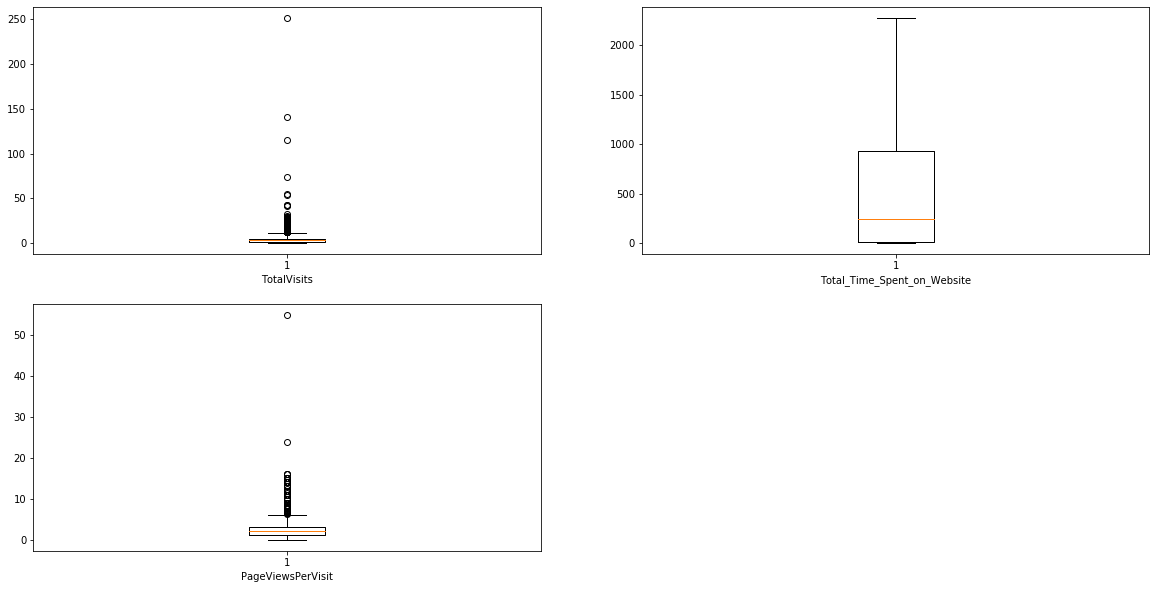

In [479]:
plt.figure(figsize = (20,10))  
plt.subplot(2,2,1)
plt.boxplot(x=lead_df_1['TotalVisits'])
plt.xlabel("TotalVisits")
plt.subplot(2,2,2)
plt.boxplot(x=lead_df_1['Total_Time_Spent_on_Website'])
plt.xlabel("Total_Time_Spent_on_Website")
plt.subplot(2,2,3)
plt.boxplot(x=lead_df_1['PageViewsPerVisit'])
plt.xlabel("PageViewsPerVisit")
plt.show()

#### Treating Outliers : IQR Rule

In [480]:
# Outlier treatment for PC1
Q1 = lead_df_1['TotalVisits'].quantile(0.05)
Q3 = lead_df_1['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
lead_df_1= lead_df_1[(lead_df_1['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_df_1['TotalVisits']<= Q3 + 1.5*IQR)]

Q1 = lead_df_1['Total_Time_Spent_on_Website'].quantile(0.05)
Q3 = lead_df_1['Total_Time_Spent_on_Website'].quantile(0.95)
IQR = Q3 - Q1
lead_df_1= lead_df_1[(lead_df_1['Total_Time_Spent_on_Website'] >= Q1 - 1.5*IQR) & (lead_df_1['Total_Time_Spent_on_Website']<= Q3 + 1.5*IQR)]


Q1 = lead_df_1['PageViewsPerVisit'].quantile(0.05)
Q3 = lead_df_1['PageViewsPerVisit'].quantile(0.95)
IQR = Q3 - Q1
lead_df_1= lead_df_1[(lead_df_1['PageViewsPerVisit'] >= Q1 - 1.5*IQR) & (lead_df_1['PageViewsPerVisit']<= Q3 + 1.5*IQR)]

#### After Outlier Treatment : Plotting Outlier using Boxplot

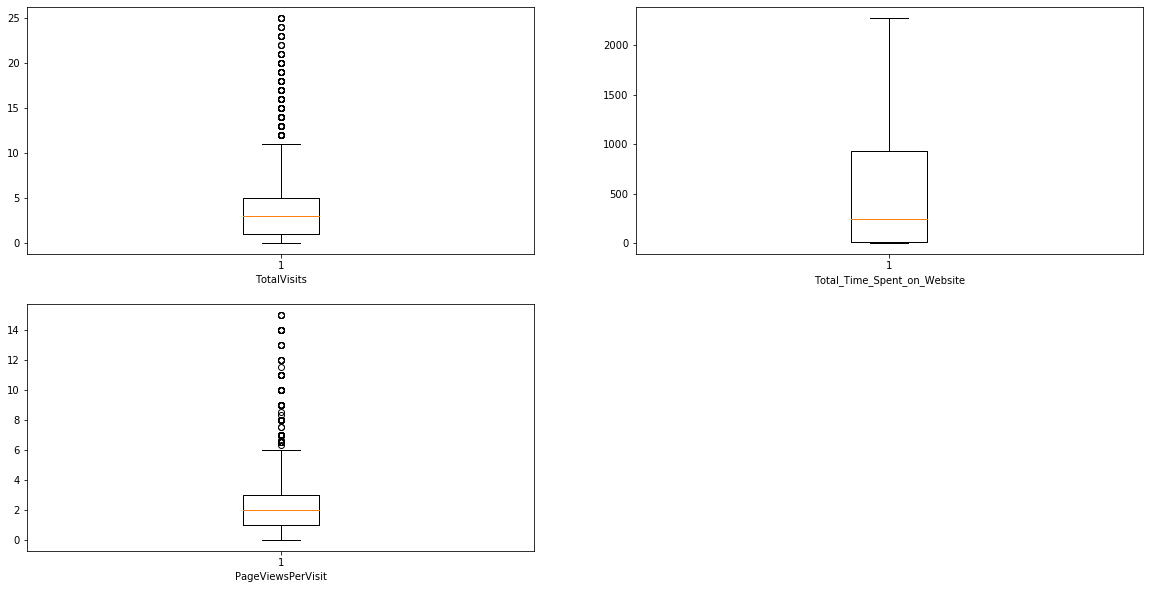

In [481]:
plt.figure(figsize = (20,10))  
plt.subplot(2,2,1)
plt.boxplot(x=lead_df_1['TotalVisits'])
plt.xlabel("TotalVisits")
plt.subplot(2,2,2)
plt.boxplot(x=lead_df_1['Total_Time_Spent_on_Website'])
plt.xlabel("Total_Time_Spent_on_Website")
plt.subplot(2,2,3)
plt.boxplot(x=lead_df_1['PageViewsPerVisit'])
plt.xlabel("PageViewsPerVisit")

plt.show()

In [482]:
lead_df_1.head(3) # Looking at the head of the data

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit,LastActivity,Country,Specialization,How_did_you_hear_about_X_Education,currentoccupation,What_matters_most_to_you_in_choosing_a_course,Search,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,Through_Recommendations,Tags,Lead_Quality,Lead_Profile,City,A_free_copy_of_Mastering_The_Interview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Other Leads,Other Cities,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Other Leads,Other Cities,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened


### Step 3: Data Preparation

#### Mapping binary data "Yes" with 1 and "No" with 0

In [483]:
# List of variables to map
varlist =  ['Do_Not_Call','Do_Not_Email','Search','NewspaperArticle','XEducationForums','Newspaper','DigitalAdvertisement','Through_Recommendations','A_free_copy_of_Mastering_The_Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df_1[varlist] = lead_df_1[varlist].apply(binary_map)

#### Creating Dummies for categorical variables

In [484]:
# Lead Origin
Lead_Origin =pd.get_dummies(lead_df_1['Lead_Origin'],drop_first=True,prefix='LO',prefix_sep='-').reset_index(drop=True)

# Lead Source
Lead_Source=pd.get_dummies(lead_df_1['Lead_Source'],drop_first=True ,prefix='LS',prefix_sep='-').reset_index(drop=True)

# Last Activity
LastActivity=pd.get_dummies(lead_df_1['LastActivity'],drop_first=True,prefix='LA',prefix_sep='-').reset_index(drop=True)

# Country
Country=pd.get_dummies(lead_df_1['Country'],drop_first=True,prefix='Country',prefix_sep='-').reset_index(drop=True)

# Specialization
Specialization=pd.get_dummies(lead_df_1['Specialization'],drop_first=True,prefix='Spec',prefix_sep='-').reset_index(drop=True)

# How did you hear about X Education
How_did_you_hear_about_X_Education=pd.get_dummies(lead_df_1['How_did_you_hear_about_X_Education'],drop_first=True,prefix='X_Edu',prefix_sep='-').reset_index(drop=True)

# Current Occupation
currentoccupation=pd.get_dummies(lead_df_1['currentoccupation'],drop_first=True,prefix='CO').reset_index(drop=True)

# What_matters_most_to_you_in_choosing_a_course
What_matters_most_to_you_in_choosing_a_course=pd.get_dummies(lead_df_1['What_matters_most_to_you_in_choosing_a_course'],drop_first=True,prefix='CC',prefix_sep='-').reset_index(drop=True)

# Tags
Tags=pd.get_dummies(lead_df_1['Tags'],drop_first=True,prefix='Tags',prefix_sep='-').reset_index(drop=True)

# Lead Quality
Lead_Quality=pd.get_dummies(lead_df_1['Lead_Quality'],drop_first=True,prefix='LQ',prefix_sep='-').reset_index(drop=True)

# Lead Profile
Lead_Profile=pd.get_dummies(lead_df_1['Lead_Profile'],drop_first=True,prefix='LP',prefix_sep='-').reset_index(drop=True)

# City
City=pd.get_dummies(lead_df_1['City'],drop_first='Tier II Cities',prefix='City',prefix_sep='-').reset_index(drop=True)

# Last Notable Activity
LastNotableActivity=pd.get_dummies(lead_df_1['LastNotableActivity'],drop_first=True,prefix='LNA',prefix_sep='-').reset_index(drop=True)

#### Dropping columns redundant columns from the dataframe

In [485]:
lead_df_1.drop(['Lead_Origin','Lead_Source','LastActivity','Country','Specialization','How_did_you_hear_about_X_Education','currentoccupation','What_matters_most_to_you_in_choosing_a_course','Tags','Lead_Quality','Lead_Profile','City','LastNotableActivity'],axis=1,inplace=True)

In [486]:
lead_df_1.reset_index(drop=True,inplace=True)

#### Concating dummy columns to the main dataframe

In [487]:
lead_df_2=pd.concat([lead_df_1,Lead_Origin,Lead_Source,LastActivity,Country,Specialization,How_did_you_hear_about_X_Education,currentoccupation,What_matters_most_to_you_in_choosing_a_course,Tags,Lead_Quality,Lead_Profile,City,LastNotableActivity],axis=1)

In [488]:
# Looking at the shape after creating dummy variables
lead_df_2.head()

,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit,Search,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,LO-Landing Page Submission,LO-Lead Add Form,LO-Lead Import,LO-Quick Add Form,LS-Direct Traffic,LS-Facebook,LS-Google,LS-Live Chat,LS-NC_EDM,LS-Olark Chat,LS-Organic Search,LS-Pay per Click Ads,LS-Press_Release,LS-Reference,LS-Referral Sites,LS-Social Media,LS-WeLearn,LS-Welingak Website,LS-bing,LS-blog,LS-testone,LS-welearnblog_Home,LS-youtubechannel,LA-Converted to Lead,LA-Email Bounced,LA-Email Link Clicked,LA-Email Marked Spam,LA-Email Opened,LA-Email Received,LA-Form Submitted on Website,LA-Had a Phone Conversation,LA-Olark Chat Conversation,LA-Page Visited on Website,LA-Resubscribed to emails,LA-SMS Sent,LA-Unreachable,LA-Unsubscribed,LA-View in browser link Clicked,LA-Visited Booth in Tradeshow,Country-Australia,Country-Bahrain,Country-Bangladesh,Country-Canada,Country-China,Country-Denmark,Country-France,Country-Germany,Country-Ghana,Country-Hong Kong,Country-India,Country-Italy,Country-Kenya,Country-Kuwait,Country-Liberia,Country-Nigeria,Country-Oman,Country-Philippines,Country-Qatar,Country-Russia,Country-Saudi Arabia,Country-Singapore,Country-South Africa,Country-Sri Lanka,Country-Sweden,Country-Tanzania,Country-Uganda,Country-United Arab Emirates,Country-United Kingdom,Country-United States,Country-unknown,Spec-Business Administration,Spec-E-Business,Spec-E-COMMERCE,Spec-Finance Management,Spec-Healthcare Management,Spec-Hospitality Management,Spec-Human Resource Management,Spec-IT Projects Management,Spec-International Business,Spec-Marketing Management,Spec-Media and Advertising,Spec-Operations Management,Spec-Retail Management,Spec-Rural and Agribusiness,Spec-Services Excellence,Spec-Supply Chain Management,Spec-Travel and Tourism,X_Edu-Email,X_Edu-Multiple Sources,X_Edu-Online Search,X_Edu-Other,X_Edu-SMS,X_Edu-Social Media,X_Edu-Student of SomeSchool,X_Edu-Word Of Mouth,CO_Housewife,CO_Other,CO_Student,CO_Unemployed,CO_Working Professional,CC-Flexibility & Convenience,CC-Other,Tags-Busy,Tags-Closed by Horizzon,Tags-Diploma holder (Not Eligible),Tags-Graduation in progress,Tags-In confusion whether part time or DLP,Tags-Interested in full time MBA,Tags-Interested in Next batch,Tags-Interested in other courses,Tags-Lateral student,Tags-Lost to EINS,Tags-Lost to Others,Tags-Not doing further education,Tags-Recognition issue (DEC approval),Tags-Ringing,Tags-Shall take in the next coming month,Tags-Still Thinking,Tags-University not recognized,Tags-Want to take admission but has financial problems,Tags-Will revert after reading the email,Tags-in touch with EINS,Tags-invalid number,Tags-number not provided,Tags-opp hangup,Tags-switched off,Tags-wrong number given,LQ-Low in Relevance,LQ-Might be,LQ-Not Sure,LQ-Worst,LP-Lateral Student,LP-Other Leads,LP-Potential Lead,LP-Student of SomeSchool,City-Other Cities,City-Other Cities of Maharashtra,City-Other Metro Cities,City-Thane & Outskirts,City-Tier II Cities,LNA-Email Bounced,LNA-Email Link Clicked,LNA-Email Marked Spam,LNA-Email Opened,LNA-Email Received,LNA-Form Submitted on Website,LNA-Had a Phone Conversation,LNA-Modified,LNA-Olark Chat Conversation,LNA-Page Visited on Website,LNA-Resubscribed to emails,LNA-SMS Sent,LNA-Unreachable,LNA-Unsubscribed,LNA-View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [489]:
lead_df_2.shape

(9078, 168)

### Checking for multicolinearity in data

In [490]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(lead_df_2, 15))

Top Absolute Correlations
LA-Email Marked Spam       LNA-Email Marked Spam         1.000000
LS-youtubechannel          Country-Canada                1.000000
LA-Resubscribed to emails  LNA-Resubscribed to emails    1.000000
LO-Lead Import             LS-Facebook                   0.990812
Country-India              Country-unknown               0.957470
LP-Other Leads             LP-Potential Lead             0.904718
LA-Unsubscribed            LNA-Unsubscribed              0.874916
LO-Lead Add Form           LS-Reference                  0.852654
LA-SMS Sent                LNA-SMS Sent                  0.852316
CO_Unemployed              CO_Working Professional       0.848558
LA-Email Opened            LNA-Email Opened              0.841996
LA-Email Link Clicked      LNA-Email Link Clicked        0.798940
LS-Olark Chat              Country-unknown               0.779899
                           Country-India                 0.747839
NewspaperArticle           XEducationForums       

In [491]:
lead_df_2.drop(['LNA-Email Marked Spam','Country-Canada','LNA-Resubscribed to emails','LO-Lead Import','Country-unknown','LP-Other Leads','LNA-Unsubscribed','LO-Lead Add Form','LNA-SMS Sent','CO_Unemployed','LNA-Email Opened','LNA-Email Link Clicked','XEducationForums'],axis=1,inplace=True)

In [492]:
lead_df_2.shape 

(9078, 155)

### Step 4: Test-Train Split

In [493]:
from sklearn.model_selection import train_test_split

In [494]:
X = lead_df_2.drop(['Converted'],axis=1)
X.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit,Search,NewspaperArticle,Newspaper,DigitalAdvertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,LO-Landing Page Submission,LO-Quick Add Form,LS-Direct Traffic,LS-Facebook,LS-Google,LS-Live Chat,LS-NC_EDM,LS-Olark Chat,LS-Organic Search,LS-Pay per Click Ads,LS-Press_Release,LS-Reference,LS-Referral Sites,LS-Social Media,LS-WeLearn,LS-Welingak Website,LS-bing,LS-blog,LS-testone,LS-welearnblog_Home,LS-youtubechannel,LA-Converted to Lead,LA-Email Bounced,LA-Email Link Clicked,LA-Email Marked Spam,LA-Email Opened,LA-Email Received,LA-Form Submitted on Website,LA-Had a Phone Conversation,LA-Olark Chat Conversation,LA-Page Visited on Website,LA-Resubscribed to emails,LA-SMS Sent,LA-Unreachable,LA-Unsubscribed,LA-View in browser link Clicked,LA-Visited Booth in Tradeshow,Country-Australia,Country-Bahrain,Country-Bangladesh,Country-China,Country-Denmark,Country-France,Country-Germany,Country-Ghana,Country-Hong Kong,Country-India,Country-Italy,Country-Kenya,Country-Kuwait,Country-Liberia,Country-Nigeria,Country-Oman,Country-Philippines,Country-Qatar,Country-Russia,Country-Saudi Arabia,Country-Singapore,Country-South Africa,Country-Sri Lanka,Country-Sweden,Country-Tanzania,Country-Uganda,Country-United Arab Emirates,Country-United Kingdom,Country-United States,Spec-Business Administration,Spec-E-Business,Spec-E-COMMERCE,Spec-Finance Management,Spec-Healthcare Management,Spec-Hospitality Management,Spec-Human Resource Management,Spec-IT Projects Management,Spec-International Business,Spec-Marketing Management,Spec-Media and Advertising,Spec-Operations Management,Spec-Retail Management,Spec-Rural and Agribusiness,Spec-Services Excellence,Spec-Supply Chain Management,Spec-Travel and Tourism,X_Edu-Email,X_Edu-Multiple Sources,X_Edu-Online Search,X_Edu-Other,X_Edu-SMS,X_Edu-Social Media,X_Edu-Student of SomeSchool,X_Edu-Word Of Mouth,CO_Housewife,CO_Other,CO_Student,CO_Working Professional,CC-Flexibility & Convenience,CC-Other,Tags-Busy,Tags-Closed by Horizzon,Tags-Diploma holder (Not Eligible),Tags-Graduation in progress,Tags-In confusion whether part time or DLP,Tags-Interested in full time MBA,Tags-Interested in Next batch,Tags-Interested in other courses,Tags-Lateral student,Tags-Lost to EINS,Tags-Lost to Others,Tags-Not doing further education,Tags-Recognition issue (DEC approval),Tags-Ringing,Tags-Shall take in the next coming month,Tags-Still Thinking,Tags-University not recognized,Tags-Want to take admission but has financial problems,Tags-Will revert after reading the email,Tags-in touch with EINS,Tags-invalid number,Tags-number not provided,Tags-opp hangup,Tags-switched off,Tags-wrong number given,LQ-Low in Relevance,LQ-Might be,LQ-Not Sure,LQ-Worst,LP-Lateral Student,LP-Potential Lead,LP-Student of SomeSchool,City-Other Cities,City-Other Cities of Maharashtra,City-Other Metro Cities,City-Thane & Outskirts,City-Tier II Cities,LNA-Email Bounced,LNA-Email Received,LNA-Form Submitted on Website,LNA-Had a Phone Conversation,LNA-Modified,LNA-Olark Chat Conversation,LNA-Page Visited on Website,LNA-Unreachable,LNA-View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [495]:
y = lead_df_2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [496]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [497]:
print('Train Data:',X_train.shape)
print('Test Data:',X_test.shape)

Train Data: (6354, 154)
Test Data: (2724, 154)


In [498]:
X_train.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit,Search,NewspaperArticle,Newspaper,DigitalAdvertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,LO-Landing Page Submission,LO-Quick Add Form,LS-Direct Traffic,LS-Facebook,LS-Google,LS-Live Chat,LS-NC_EDM,LS-Olark Chat,LS-Organic Search,LS-Pay per Click Ads,LS-Press_Release,LS-Reference,LS-Referral Sites,LS-Social Media,LS-WeLearn,LS-Welingak Website,LS-bing,LS-blog,LS-testone,LS-welearnblog_Home,LS-youtubechannel,LA-Converted to Lead,LA-Email Bounced,LA-Email Link Clicked,LA-Email Marked Spam,LA-Email Opened,LA-Email Received,LA-Form Submitted on Website,LA-Had a Phone Conversation,LA-Olark Chat Conversation,LA-Page Visited on Website,LA-Resubscribed to emails,LA-SMS Sent,LA-Unreachable,LA-Unsubscribed,LA-View in browser link Clicked,LA-Visited Booth in Tradeshow,Country-Australia,Country-Bahrain,Country-Bangladesh,Country-China,Country-Denmark,Country-France,Country-Germany,Country-Ghana,Country-Hong Kong,Country-India,Country-Italy,Country-Kenya,Country-Kuwait,Country-Liberia,Country-Nigeria,Country-Oman,Country-Philippines,Country-Qatar,Country-Russia,Country-Saudi Arabia,Country-Singapore,Country-South Africa,Country-Sri Lanka,Country-Sweden,Country-Tanzania,Country-Uganda,Country-United Arab Emirates,Country-United Kingdom,Country-United States,Spec-Business Administration,Spec-E-Business,Spec-E-COMMERCE,Spec-Finance Management,Spec-Healthcare Management,Spec-Hospitality Management,Spec-Human Resource Management,Spec-IT Projects Management,Spec-International Business,Spec-Marketing Management,Spec-Media and Advertising,Spec-Operations Management,Spec-Retail Management,Spec-Rural and Agribusiness,Spec-Services Excellence,Spec-Supply Chain Management,Spec-Travel and Tourism,X_Edu-Email,X_Edu-Multiple Sources,X_Edu-Online Search,X_Edu-Other,X_Edu-SMS,X_Edu-Social Media,X_Edu-Student of SomeSchool,X_Edu-Word Of Mouth,CO_Housewife,CO_Other,CO_Student,CO_Working Professional,CC-Flexibility & Convenience,CC-Other,Tags-Busy,Tags-Closed by Horizzon,Tags-Diploma holder (Not Eligible),Tags-Graduation in progress,Tags-In confusion whether part time or DLP,Tags-Interested in full time MBA,Tags-Interested in Next batch,Tags-Interested in other courses,Tags-Lateral student,Tags-Lost to EINS,Tags-Lost to Others,Tags-Not doing further education,Tags-Recognition issue (DEC approval),Tags-Ringing,Tags-Shall take in the next coming month,Tags-Still Thinking,Tags-University not recognized,Tags-Want to take admission but has financial problems,Tags-Will revert after reading the email,Tags-in touch with EINS,Tags-invalid number,Tags-number not provided,Tags-opp hangup,Tags-switched off,Tags-wrong number given,LQ-Low in Relevance,LQ-Might be,LQ-Not Sure,LQ-Worst,LP-Lateral Student,LP-Potential Lead,LP-Student of SomeSchool,City-Other Cities,City-Other Cities of Maharashtra,City-Other Metro Cities,City-Thane & Outskirts,City-Tier II Cities,LNA-Email Bounced,LNA-Email Received,LNA-Form Submitted on Website,LNA-Had a Phone Conversation,LNA-Modified,LNA-Olark Chat Conversation,LNA-Page Visited on Website,LNA-Unreachable,LNA-View in browser link Clicked
7529,0,0,11.0,269,1.83,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4092,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1979,0,0,2.0,568,2.00,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Step 5: Feature Scaling

#### Standard Scaler

In [499]:
from sklearn.preprocessing import StandardScaler

In [500]:
scaler = StandardScaler()

In [501]:
X_train[['TotalVisits','Total_Time_Spent_on_Website','PageViewsPerVisit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','PageViewsPerVisit']])

In [502]:
X_train.head(3)

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,PageViewsPerVisit,Search,NewspaperArticle,Newspaper,DigitalAdvertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,LO-Landing Page Submission,LO-Quick Add Form,LS-Direct Traffic,LS-Facebook,LS-Google,LS-Live Chat,LS-NC_EDM,LS-Olark Chat,LS-Organic Search,LS-Pay per Click Ads,LS-Press_Release,LS-Reference,LS-Referral Sites,LS-Social Media,LS-WeLearn,LS-Welingak Website,LS-bing,LS-blog,LS-testone,LS-welearnblog_Home,LS-youtubechannel,LA-Converted to Lead,LA-Email Bounced,LA-Email Link Clicked,LA-Email Marked Spam,LA-Email Opened,LA-Email Received,LA-Form Submitted on Website,LA-Had a Phone Conversation,LA-Olark Chat Conversation,LA-Page Visited on Website,LA-Resubscribed to emails,LA-SMS Sent,LA-Unreachable,LA-Unsubscribed,LA-View in browser link Clicked,LA-Visited Booth in Tradeshow,Country-Australia,Country-Bahrain,Country-Bangladesh,Country-China,Country-Denmark,Country-France,Country-Germany,Country-Ghana,Country-Hong Kong,Country-India,Country-Italy,Country-Kenya,Country-Kuwait,Country-Liberia,Country-Nigeria,Country-Oman,Country-Philippines,Country-Qatar,Country-Russia,Country-Saudi Arabia,Country-Singapore,Country-South Africa,Country-Sri Lanka,Country-Sweden,Country-Tanzania,Country-Uganda,Country-United Arab Emirates,Country-United Kingdom,Country-United States,Spec-Business Administration,Spec-E-Business,Spec-E-COMMERCE,Spec-Finance Management,Spec-Healthcare Management,Spec-Hospitality Management,Spec-Human Resource Management,Spec-IT Projects Management,Spec-International Business,Spec-Marketing Management,Spec-Media and Advertising,Spec-Operations Management,Spec-Retail Management,Spec-Rural and Agribusiness,Spec-Services Excellence,Spec-Supply Chain Management,Spec-Travel and Tourism,X_Edu-Email,X_Edu-Multiple Sources,X_Edu-Online Search,X_Edu-Other,X_Edu-SMS,X_Edu-Social Media,X_Edu-Student of SomeSchool,X_Edu-Word Of Mouth,CO_Housewife,CO_Other,CO_Student,CO_Working Professional,CC-Flexibility & Convenience,CC-Other,Tags-Busy,Tags-Closed by Horizzon,Tags-Diploma holder (Not Eligible),Tags-Graduation in progress,Tags-In confusion whether part time or DLP,Tags-Interested in full time MBA,Tags-Interested in Next batch,Tags-Interested in other courses,Tags-Lateral student,Tags-Lost to EINS,Tags-Lost to Others,Tags-Not doing further education,Tags-Recognition issue (DEC approval),Tags-Ringing,Tags-Shall take in the next coming month,Tags-Still Thinking,Tags-University not recognized,Tags-Want to take admission but has financial problems,Tags-Will revert after reading the email,Tags-in touch with EINS,Tags-invalid number,Tags-number not provided,Tags-opp hangup,Tags-switched off,Tags-wrong number given,LQ-Low in Relevance,LQ-Might be,LQ-Not Sure,LQ-Worst,LP-Lateral Student,LP-Potential Lead,LP-Student of SomeSchool,City-Other Cities,City-Other Cities of Maharashtra,City-Other Metro Cities,City-Thane & Outskirts,City-Tier II Cities,LNA-Email Bounced,LNA-Email Received,LNA-Form Submitted on Website,LNA-Had a Phone Conversation,LNA-Modified,LNA-Olark Chat Conversation,LNA-Page Visited on Website,LNA-Unreachable,LNA-View in browser link Clicked
7529,0,0,2.346479,-0.408960,-0.258526,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4092,0,0,-1.017609,-0.899244,-1.154571,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1979,0,0,-0.405957,0.136003,-0.175287,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### Cross Validation

In [503]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print("Cross_Val_Score:",cross_val_score(logreg,X,y,cv = 10,scoring = 'accuracy').mean())

Cross_Val_Score: 0.9158356915716077


In [504]:
converted=(sum(lead_df_2['Converted'])/len(lead_df_2['Converted'].index)*100)
print(converted)

38.764044943820224


### Step 6: Model Building

#### Running Your First Training Model

In [505]:
import statsmodels.api as sm

In [506]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6354
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 01 Dec 2019   Deviance:                          nan
Time:                        18:39:48   Pearson chi2:                 3.82e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

### Step 7: Feature Selection Using RFE

In [507]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [508]:
from sklearn.feature_selection import RFE # importing RFE library

In [509]:
rfe=RFE(logreg,15) # Running RFE and fetching top 15 columns for model building

In [510]:
rfe=rfe.fit(X_train,y_train)

In [511]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False,

In [512]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # List of Ranks assignedby RFE for different columns.

[('Do_Not_Email', False, 22),
 ('Do_Not_Call', False, 106),
 ('TotalVisits', False, 85),
 ('Total_Time_Spent_on_Website', False, 5),
 ('PageViewsPerVisit', False, 84),
 ('Search', False, 63),
 ('NewspaperArticle', False, 47),
 ('Newspaper', False, 108),
 ('DigitalAdvertisement', False, 110),
 ('Through_Recommendations', False, 87),
 ('A_free_copy_of_Mastering_The_Interview', False, 118),
 ('LO-Landing Page Submission', False, 20),
 ('LO-Quick Add Form', False, 81),
 ('LS-Direct Traffic', False, 70),
 ('LS-Facebook', False, 21),
 ('LS-Google', False, 71),
 ('LS-Live Chat', False, 61),
 ('LS-NC_EDM', False, 138),
 ('LS-Olark Chat', False, 101),
 ('LS-Organic Search', False, 94),
 ('LS-Pay per Click Ads', False, 135),
 ('LS-Press_Release', False, 89),
 ('LS-Reference', False, 28),
 ('LS-Referral Sites', False, 86),
 ('LS-Social Media', False, 80),
 ('LS-WeLearn', False, 133),
 ('LS-Welingak Website', True, 1),
 ('LS-bing', False, 88),
 ('LS-blog', False, 67),
 ('LS-testone', False, 122),


In [513]:
col=X_train.columns[rfe.support_] # Storing the 15 columns ranked by RFE into a new variable

In [514]:
list(col) # List of 15 Top features ranked by RFE for model Building

['LS-Welingak Website',
 'LA-SMS Sent',
 'Tags-Busy',
 'Tags-Closed by Horizzon',
 'Tags-Lost to EINS',
 'Tags-Ringing',
 'Tags-Will revert after reading the email',
 'Tags-invalid number',
 'Tags-number not provided',
 'Tags-switched off',
 'Tags-wrong number given',
 'LQ-Not Sure',
 'LQ-Worst',
 'LNA-Modified',
 'LNA-Olark Chat Conversation']

## Step 8 : Rebuilding models with RFE columns

#### Running Your Second Training Model

In [515]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6354
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1604.1
Date:                Sun, 01 Dec 2019   Deviance:                       3208.1
Time:                        18:39:56   Pearson chi2:                 2.94e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [516]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7529    6.299317e-03
4092    7.323693e-01
1979    3.421789e-01
1883    6.659112e-02
438     9.334036e-01
7386    9.903094e-01
8056    6.659112e-02
6407    9.988250e-01
7661    1.611657e-13
2280    9.510414e-01
dtype: float64

In [517]:
# y_train_pred=y_train_pred.values.reshape(-1)
# y_train_pred[:10]

#### Creating a dataframe with the actual converted score and the predicted probabilities

In [518]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})

In [519]:
y_train_pred_final['Index'] = y_train.index

In [520]:
y_train_pred_final.head()

,Converted,Converted_Prob,Index
7529,0,0.006299,7529
4092,1,0.732369,4092
1979,0,0.342179,1979
1883,0,0.066591,1883
438,1,0.933404,438


#### Creating new column 'predicted' with 1 if Conveted > 0.5 else 0

In [521]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted
7529,0,0.006299,7529,0
4092,1,0.732369,4092,1
1979,0,0.342179,1979,0
1883,0,0.066591,1883,0
438,1,0.933404,438,1


In [522]:
from sklearn import metrics

In [523]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3754  152]
 [ 378 2070]]


In [524]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))    

0.9165879760780611


In [525]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [526]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags-Busy,1.12
9,Tags-switched off,1.10
3,Tags-Closed by Horizzon,1.09
14,LNA-Olark Chat Conversation,1.06
4,Tags-Lost to EINS,1.05
0,LS-Welingak Website,1.04
7,Tags-invalid number,1.03
10,Tags-wrong number given,1.02
8,Tags-number not provided,1.01
12,LQ-Worst,0.42


In [527]:
# Dropping Tags-number not provided column with high p value
col = col.drop('Tags-number not provided', 1)
col

Index(['LS-Welingak Website', 'LA-SMS Sent', 'Tags-Busy',
       'Tags-Closed by Horizzon', 'Tags-Lost to EINS', 'Tags-Ringing',
       'Tags-Will revert after reading the email', 'Tags-invalid number',
       'Tags-switched off', 'Tags-wrong number given', 'LQ-Not Sure',
       'LQ-Worst', 'LNA-Modified', 'LNA-Olark Chat Conversation'],
      dtype='object')

### Runnning Third Model

In [528]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6354
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1609.7
Date:                Sun, 01 Dec 2019   Deviance:                       3219.4
Time:                        18:39:59   Pearson chi2:                 2.88e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [529]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [530]:
y_train_pred[:10]

array([5.95781413e-03, 7.29205705e-01, 3.42520820e-01, 6.78442134e-02,
       9.32819425e-01, 9.90038663e-01, 6.78442134e-02, 9.98814621e-01,
       4.54191239e-13, 9.50563017e-01])

In [531]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [532]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted
7529,0,0.005958,7529,0
4092,1,0.729206,4092,1
1979,0,0.342521,1979,0
1883,0,0.067844,1883,0
438,1,0.932819,438,1


In [533]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9161158325464275


##### Let's check the VIFs again

In [534]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags-Busy,1.12
8,Tags-switched off,1.10
3,Tags-Closed by Horizzon,1.09
13,LNA-Olark Chat Conversation,1.06
4,Tags-Lost to EINS,1.05
0,LS-Welingak Website,1.04
7,Tags-invalid number,1.03
9,Tags-wrong number given,1.02
11,LQ-Worst,0.42
10,LQ-Not Sure,0.14


In [535]:
# Let's drop Tags-invalid number since it has a high P Value
col = col.drop('Tags-invalid number',1)
col

Index(['LS-Welingak Website', 'LA-SMS Sent', 'Tags-Busy',
       'Tags-Closed by Horizzon', 'Tags-Lost to EINS', 'Tags-Ringing',
       'Tags-Will revert after reading the email', 'Tags-switched off',
       'Tags-wrong number given', 'LQ-Not Sure', 'LQ-Worst', 'LNA-Modified',
       'LNA-Olark Chat Conversation'],
      dtype='object')

#### Running Fourth Model 

In [536]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6354
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.5
Date:                Sun, 01 Dec 2019   Deviance:                       3231.0
Time:                        18:40:01   Pearson chi2:                 2.85e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [537]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [538]:
y_train_pred[:10]

array([5.14399779e-03, 7.25746399e-01, 3.41680778e-01, 6.89307857e-02,
       9.32648865e-01, 9.89804154e-01, 6.89307857e-02, 9.98810747e-01,
       1.27483309e-12, 9.50100948e-01])

In [539]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [540]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted
7529,0,0.005144,7529,0
4092,1,0.725746,4092,1
1979,0,0.341681,1979,0
1883,0,0.068931,1883,0
438,1,0.932649,438,1


In [541]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9156436890147939


##### Let's check the VIFs again

In [542]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags-Busy,1.11
7,Tags-switched off,1.10
3,Tags-Closed by Horizzon,1.09
12,LNA-Olark Chat Conversation,1.06
4,Tags-Lost to EINS,1.05
0,LS-Welingak Website,1.04
8,Tags-wrong number given,1.02
10,LQ-Worst,0.42
9,LQ-Not Sure,0.14
6,Tags-Will revert after reading the email,0.10


In [543]:
# Let's drop Tags-wrong number given since it has a high P value
col = col.drop('Tags-wrong number given',1)
col

Index(['LS-Welingak Website', 'LA-SMS Sent', 'Tags-Busy',
       'Tags-Closed by Horizzon', 'Tags-Lost to EINS', 'Tags-Ringing',
       'Tags-Will revert after reading the email', 'Tags-switched off',
       'LQ-Not Sure', 'LQ-Worst', 'LNA-Modified',
       'LNA-Olark Chat Conversation'],
      dtype='object')

#### Running Fifth Model

In [544]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6354
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1618.3
Date:                Sun, 01 Dec 2019   Deviance:                       3236.5
Time:                        18:40:03   Pearson chi2:                 2.86e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [545]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [546]:
y_train_pred[:10]

array([0.00484337, 0.72473078, 0.34178144, 0.06927341, 0.93265586,
       0.98975593, 0.06927341, 0.99881148, 0.00187082, 0.95013776])

In [547]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [548]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted
7529,0,0.004843,7529,0
4092,1,0.724731,4092,1
1979,0,0.341781,1979,0
1883,0,0.069273,1883,0
438,1,0.932656,438,1


In [549]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9154863078375827


##### Let's check the VIFs again

In [550]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags-Busy,1.11
7,Tags-switched off,1.10
3,Tags-Closed by Horizzon,1.09
11,LNA-Olark Chat Conversation,1.06
4,Tags-Lost to EINS,1.05
0,LS-Welingak Website,1.04
9,LQ-Worst,0.42
8,LQ-Not Sure,0.14
6,Tags-Will revert after reading the email,0.10
1,LA-SMS Sent,0.09


In [551]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3747,  159],
       [ 378, 2070]], dtype=int64)

In [552]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9154863078375827

### Metrics beyond simply accuracy

In [553]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [554]:
# Sensitivity/TPR/Recall of the model
TP/float(TP+FN)

0.8455882352941176

In [555]:
# Specificity of the model
TN/float(TN+FP)

0.9592933947772657

In [556]:
# FPR - Calculate false postive rate - predicting customers converted when customer has not converted
print(FP/ float(TN+FP))

0.040706605222734255


In [557]:
# Precision/Positive predictive value 
print (TP / float(TP+FP))

0.9286675639300135


In [558]:
# True Negative predictive value
print (TN / float(TN+ FP))

0.9592933947772657


### Plotting the ROC Curve

In [559]:
def draw_roc(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [560]:
# fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

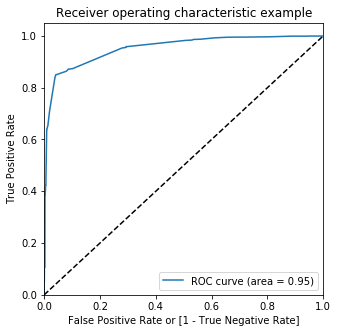

In [561]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Checking the AUC

In [562]:
metrics.auc(fpr, tpr)

0.9532339742946163

### Step 9: Finding Optimal Cutoff Point

In [563]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

In [564]:
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7529,0,0.004843,7529,0,1,0,0,0,0,0,0,0,0,0
4092,1,0.724731,4092,1,1,1,1,1,1,1,1,1,0,0
1979,0,0.341781,1979,0,1,1,1,1,0,0,0,0,0,0
1883,0,0.069273,1883,0,1,0,0,0,0,0,0,0,0,0
438,1,0.932656,438,1,1,1,1,1,1,1,1,1,1,1


In [565]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385269  1.000000  0.000000
0.1   0.1  0.802801  0.955474  0.707117
0.2   0.2  0.805792  0.955065  0.712238
0.3   0.3  0.897387  0.871732  0.913466
0.4   0.4  0.915486  0.845588  0.959293
0.5   0.5  0.915486  0.845588  0.959293
0.6   0.6  0.915486  0.845588  0.959293
0.7   0.7  0.915486  0.845588  0.959293
0.8   0.8  0.855209  0.638480  0.991039
0.9   0.9  0.854737  0.637255  0.991039


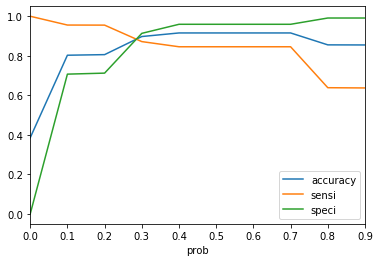

In [566]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [567]:
y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7529,0,0.004843,7529,0,1,0,0,0,0,0,0,0,0,0
4092,1,0.724731,4092,1,1,1,1,1,1,1,1,1,0,0
1979,0,0.341781,1979,0,1,1,1,1,0,0,0,0,0,0
1883,0,0.069273,1883,0,1,0,0,0,0,0,0,0,0,0
438,1,0.932656,438,1,1,1,1,1,1,1,1,1,1,1


In [568]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7529,0,0.004843,7529,0,1,0,0,0,0,0,0,0,0,0,0
4092,1,0.724731,4092,1,1,1,1,1,1,1,1,1,0,0,1
1979,0,0.341781,1979,0,1,1,1,1,0,0,0,0,0,0,1
1883,0,0.069273,1883,0,1,0,0,0,0,0,0,0,0,0,0
438,1,0.932656,438,1,1,1,1,1,1,1,1,1,1,1,1


In [569]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.897387472458294

In [570]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3568,  338],
       [ 314, 2134]], dtype=int64)

In [571]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [572]:
# Let's see the sensitivity/TPR/Recall of our logistic regression model
TP / float(TP+FN)

0.8717320261437909

In [573]:
# Let us calculate specificity
TN / float(TN+FP)

0.9134664618535586

In [574]:
# Calculate false postive rate - predicting leads Converted when lead has not Converted
print(FP/ float(TN+FP))

0.08653353814644137


In [575]:
# Precision/Positive predictive value 
print (TP / float(TP+FP))

0.8632686084142395


In [576]:
# Negative predictive value
print (TN / float(TN+ FP))

0.9134664618535586


## Precision and Recall

In [577]:
#Looking at the confusion matrix again

In [578]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3747,  159],
       [ 378, 2070]], dtype=int64)

### Precision

In [579]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9286675639300135

### Recall

In [580]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8455882352941176

In [581]:
from sklearn.metrics import precision_score, recall_score

In [582]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9286675639300135

In [583]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8455882352941176

## Precision and Recall Tradeoff

In [584]:
from sklearn.metrics import precision_recall_curve

In [585]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(7529    0
 4092    1
 1979    0
 1883    0
 438     1
 7386    1
 8056    0
 6407    1
 7661    0
 2280    1
 4750    0
 4838    0
 4428    1
 373     1
 4264    0
 2585    1
 8979    1
 6850    0
 4267    1
 3487    0
 1784    1
 5384    0
 6978    0
 8436    0
 6011    0
 5402    0
 5391    1
 4224    0
 3872    1
 7600    1
 5664    0
 4630    0
 5685    0
 4013    1
 5173    0
 8477    1
 1541    1
 7521    0
 322     0
 2031    0
 993     1
 8663    0
 7740    0
 6182    0
 5210    1
 6444    0
 2184    1
 110     1
 4112    0
 5940    0
 1079    0
 2226    1
 7888    0
 8284    0
 2705    0
 5580    1
 5711    1
 1164    0
 2918    0
 1450    1
 7590    0
 8003    1
 5662    1
 5629    0
 4922    0
 6416    1
 6634    1
 4329    0
 8868    0
 3284    1
 7372    1
 8169    0
 7382    0
 1514    0
 2313    1
 8300    0
 1451    0
 2020    0
 6423    0
 5652    0
 4149    1
 7689    0
 838     0
 9000    1
 2374    0
 3481    1
 4453    0
 7244    0
 5164    0
 5687    0
 7505    0

In [586]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

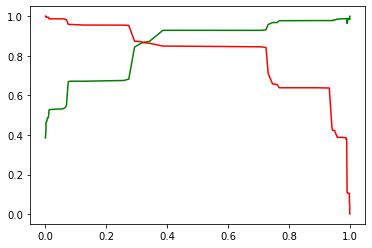

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test set

In [128]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','PageViewsPerVisit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','PageViewsPerVisit']])

In [129]:
X_test = X_test[col]
X_test.head()

,LS-Welingak Website,LA-SMS Sent,Tags-Busy,Tags-Closed by Horizzon,Tags-Lost to EINS,Tags-Ringing,Tags-Will revert after reading the email,Tags-switched off,LQ-Not Sure,LQ-Worst,LNA-Modified,LNA-Olark Chat Conversation
1400,0,0,0,0,0,0,1,0,1,0,1,0
8074,0,1,0,0,0,1,0,0,1,0,0,0
743,0,0,0,0,0,0,1,0,1,0,0,0
1488,0,0,0,0,0,0,1,0,0,0,0,0
267,0,0,0,0,0,0,1,0,1,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

1400    0.069273
8074    0.011166
743     0.273987
1488    0.932656
267     0.273987
1718    0.273987
2644    0.989756
1945    0.732002
2907    0.724731
4350    0.069273
dtype: float64

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
# Let's see the head
y_pred_1.head()

,0
1400,0.069273
8074,0.011166
743,0.273987
1488,0.932656
267,0.273987


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [136]:
y_test_df.head()

,Converted
1400,1
8074,0
743,0
1488,1
267,1


In [137]:
# Putting CustID to index
y_test_df['Index'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final.head()

,Converted,Index,0
0,1,1400,0.069273
1,0,8074,0.011166
2,0,743,0.273987
3,1,1488,0.932656
4,1,267,0.273987


In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [142]:
y_pred_final.head()

,Converted,Index,Converted_Prob
0,1,1400,0.069273
1,0,8074,0.011166
2,0,743,0.273987
3,1,1488,0.932656
4,1,267,0.273987


In [143]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Index,Converted_Prob
0,1,1400,0.069273
1,0,8074,0.011166
2,0,743,0.273987
3,1,1488,0.932656
4,1,267,0.273987


In [144]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [145]:
y_pred_final.head()

,Converted,Index,Converted_Prob,final_predicted
0,1,1400,0.069273,0
1,0,8074,0.011166,0
2,0,743,0.273987,0
3,1,1488,0.932656,1
4,1,267,0.273987,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9038179148311307

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1500,  153],
       [ 109,  962]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8982259570494865

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.9074410163339383

In [151]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9286675639300135